In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import imageio
import scipy as sp

from mpl_toolkits import mplot3d

from scipy.optimize import curve_fit
from PIL import Image

from scipy.special import softmax
import imageio
#np.set_printoptions(precision=1)
%matplotlib notebook
#plt.close('all')

In [2]:
def make_nodefeature(x,y,r,t):
    A=np.zeros((len(x),2))
       
    
    



def make_adjacency(x,y,r,t,ide,split_id,run):
    A=np.zeros((len(x),len(x)))
    x_id = []
    t_id = []
    for i in range(len(x)):
        x_id.append(i+1)
        t_id.append(t[i])
        for j in range(len(x)):
            if ide[i]==ide[j] and ide[i]!=-2:
                if t[i]+1==t[j] or t[i]-1==t[j]:
                    A[i,j]=1
            elif ide[i]==split_id[j]:
                if ide[i]==-1:
                    A[i,j]=1
                elif t[i]+1==t[j] or t[i]-1==t[j]:
                    A[i,j]=1
              
    
    
    np.savetxt('./'+str(run)+'_GT'+'/'+'A.txt', A,fmt='%i')
    np.savetxt('./'+str(run)+'/'+'timetable.txt',np.c_[x_id,t_id], fmt='%i',delimiter='\t')
    
    return A
        

    
def make_weighted_adj_estimate(x,y,t,run):
    
    #emb without void node
    
    x=x[1:]
    y=y[1:]
    t=t[1:]
    
    #############
    
    A=np.zeros((len(x),len(x)))
    
    for i in range(len(x)):
        for j in range(len(x)):
            #A[i,0]=1.5  ####
            if t[i]+1==t[j]: #t[i]+1==t[j] or
                A[i,j]=gaus2d(x[j], y[j], x[i], y[i]) #1/((x[i]-x[j])**2+(y[i]-y[j])**2)
            #if i>j:
                #A[i,j]=0
        if np.sum(A[i,:])!=0:
            A[i,:]=mean_normal(A[i,:])
        #print(A[i,:],i)
       
    A=A.round(decimals=2)
    
    np.savetxt('./'+str(run)+'/'+'B.txt', A)
    return A
    
    
def make_dist_matrix(x,y,t,run):
    A=np.zeros((len(x),len(x)))
    
    for i in range(len(x)):
        for j in range(len(x)):
            if t[i]+1==t[j]: #t[i]+1==t[j] or
                A[i,j]=np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
       
    
    
    np.savetxt('./'+str(run)+'/'+'D.txt', A)
    return A


def make_weighted_edgelist(A,run):
    
    e1=[]
    e2=[]
    w=[]
    
    
    for i in range(len(A)):
        for j in range(len(A)):
            if i>j and j!=0:
                A[i,j]=0
            
            if A[i,j]!=0:
                e1.append(int(i+1))
                e2.append(int(j+1))
                w.append(A[i,j]*100)
    
    
    np.savetxt('./node2vec/graph/'+str(run)+'.edgelist', np.c_[e1,e2,w], fmt='%i',delimiter='\t')
    return A,e1,e2,w



def make_true_edgelist(A,run):
    
    e1=[]
    e2=[]
    w=[]
    
    
    for i in range(len(A)):
        for j in range(len(A)):
            if i>j:
                A[i,j]=0
            
            if A[i,j]!=0:
                e1.append(int(i+1))
                e2.append(int(j+1))
                #w.append(A[i,j])
    
    
    np.savetxt('./'+str(run)+'_GT'+'/'+'A.edgelist', np.c_[e1,e2], fmt='%i',delimiter='\t')
    return 0


def mean_normal(x):
    s=np.sum(x)
    return x/s


def gaus2d(x, y, mx, my, sx=0.07, sy=0.07):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))



def padding(maxlen,run):
    #A,B,E
    
    B=np.loadtxt('./'+str(run)+'/'+'B.txt')
    A=np.loadtxt('./'+str(run)+'_GT'+'/'+'A.txt')
    E=np.loadtxt('./'+str(run)+'/'+'embed.txt')
    
    
    for i in range(len(A)):
        for j in range(len(A)):
            if i>j:
                A[i,j]=0
                B[i,j]=0
                
    np.savetxt('./'+str(run)+'_GT'+'/'+'A_padded.txt', A,fmt='%i')
    #A=np.zeros((4,4))
    #B=np.zeros((4,4))
    
   #E=np.ones((4,6))
    
    h=np.ones(maxlen)*-1
    v=np.ones(len(A[0]))*-1
    
    #
    cur_E=len(E)
    cur_A=len(A)
    cur_Ah=len(A[0])
    zero_line=np.zeros(len(E[0]))
    for i in range(maxlen-cur_E):
        E=np.vstack([E, zero_line])
        
    for j in range(maxlen-cur_A):
        A=np.vstack([A, v])
        B=np.vstack([B, v])
        
    for z in range(maxlen-cur_Ah):
        A=np.column_stack([A, h])
        B=np.column_stack([B, h])
        
    #np.savetxt('./'+str(run)+'_GT'+'/'+'A_padded.txt', A,fmt='%i')
    np.savetxt('./'+str(run)+'/'+'B_padded.txt', B)
    np.savetxt('./'+str(run)+'/'+'embed_padded.txt',E)
    print(A.shape)   
    return A,B,E    
    
#x = np.linspace(-5, 5)
#y = np.linspace(-5, 5)
#x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
#z = gaus2d(x, y)

#def correct(A,B,E,max_len,run):



#def A_B_dense(A,B):

def fit_func(x,a,b):
    return a*x+b

def fingerprint_emb(pos_x,pos_y,window,t,run,void_node=True,a_x=113.89266922,b_x=19.51478307,a_y=-114.14194117,b_y=131.3404747):
    x_l,x_r,y_l,y_u=calibrate_pix_pos(pos_x,pos_y,a_x,b_x,a_y,b_y,window)
    im = blend(run,t)#Image.open(path).convert('L') # Can be many different formats.
    im_crop = im.crop((x_l, y_l, x_r, y_u))
     
    if t==10 and run==1:
        im_crop.show()
    foo = im_crop.resize((10,10),Image.ANTIALIAS)

    imarray = np.asarray(foo)
    imarray=imarray.flatten()/255
    return imarray



def fingerprint_wrap(window,run,void=False):
    pos_x,pos_y,t= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t',usecols=(0,1,6), unpack=True)
    l=len(pos_x)-1
    
    
    f_e = np.array([np.zeros(100)])


    for k in range(int(np.max(t))+1):
        path='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(k)+'.png'
        pos_x_n=pos_x[t==k]
        pos_y_n=pos_y[t==k]
        if k==0:
            pos_x_n=pos_x_n[1:]
            pos_y_n=pos_y_n[1:]
        for j in range(len(pos_x_n)):
            imarray=np.array([fingerprint_emb(pos_x_n[j],pos_y_n[j],window,k,run)])
            f_e=np.concatenate((f_e, imarray), axis=0)
            
    
    if void==False:
        f_e=f_e[1:]
            
        
    return f_e
    
    
def blend(run,t):
    
    
    
    pathm1='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(t-1)+'.png'
    path='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(t)+'.png'
    pathp1='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(t+1)+'.png'
    
    
    im = Image.open(path).convert('L')
    shape = np.asarray(im).shape
    
    #print(pixels.shape)
    try:
        imm1 = Image.open(pathm1).convert('L')
        pixels = np.asarray(imm1)
        #print(pixels)
        pixels = pixels.astype('float32')
        pixels = pixels/2
        #pixels = pixels.astype('int')
        imm1 = Image.fromarray(pixels).convert('L')
    except:
        pix=255*np.ones(shape)
        imm1 = Image.fromarray(pix).convert('L')
        
    try:
        imp1 = Image.open(pathp1).convert('L')
    except:
        pix=255*np.ones(shape)
        imp1 = Image.fromarray(pix).convert('L')
    
    
    
    im3 = Image.blend(imm1, imp1, 0.5)
    im4 = Image.blend(im3, im, 0.5)
    #im4.show()
    return im4
    
    


    
    
    
'''
pos_x=[5.926355409057428858e-01,4.604170197372819962e-01,6.250962551422760416e-02,1.223613241454796496e-01,6.376507269405902179e-01,1.103583087228645621e-01,4.233227679149828004e-01]
pos_y=[5.378065857159227692e-01,5.482527480620434934e-01,1.628245440499290486e-01,8.255699686855265673e-01,5.184511465256566032e-01,1.492480151352687523e-01,5.115442664966730613e-01]
pix_x=[87,72,27,33,92,32,68]
pix_y=[70,69,113,37,72,114,73]


plt.errorbar(pos_y, pix_y,fmt='.')   

popt, pcov = curve_fit(fit_func, pos_y,pix_y)

plt.plot(pos_y, fit_func(np.array(pos_y),*popt))
print(popt)
'''

a_y=-114.14194117
a_x=113.89266922
b_y=131.3404747
b_x=19.51478307
    
def calibrate_pix_pos(pos_x,pos_y,a_x,b_x,a_y,b_y,window):
    pix_x0=int(fit_func(pos_x,a_x,b_x))
    
    pix_y0=int(fit_func(pos_y,a_y,b_y))
    #print(pix_x0,pix_y0,int(pix_x0-window))
    return int(pix_x0-window),int(pix_x0+window),int(pix_y0-window),int(pix_y0+window)

In [3]:
A=np.loadtxt('./'+str(2)+'/'+'embed.txt')
print(A)

A=np.vstack([A, np.zeros(len(A[0]))])
#A=np.append(A,np.zeros(len(A[0])))
#print(A)


A=np.ones((3,4))
B=np.zeros((3,2))
print(np.c_[A, B])
print(gaus2d(1.8*0.07, 1.8*0.07, 0, 0, sx=0.07, sy=0.07))


#A,B,E =padding(7,1)

#print(E)
#blend(10)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.34564343  0.4228358   0.83579415 ...  1.          1.
   1.        ]
 [-0.45608157  0.11756085  0.20810717 ...  1.          1.
   1.        ]
 ...
 [ 0.41631582 -0.0660716   0.14245771 ...  0.74117647  0.81176471
   0.77647059]
 [ 0.19548158 -0.1464654  -0.07056799 ...  0.8745098   0.8745098
   0.8745098 ]
 [ 0.38638848  0.29515862 -0.1725945  ...  0.8745098   0.8745098
   0.8745098 ]]
[[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0.]]
1.2720668358645384


In [4]:
lenA=[]
for i in range(1,100):

    run=i

    x,y,r,ide,split_id,split_prob,t= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    #print(len(x))
    A=make_adjacency(x,y,r,t,ide,split_id,run)
    print(len(A),i)
    lenA.append(len(A))
    
    B=make_weighted_adj_estimate(x,y,t,run)
    #print(B)
    C,e1,e2,w=make_weighted_edgelist(B,run)
    make_true_edgelist(A,run)
    
    make_dist_matrix(x,y,t,run)
    
maxlen=np.max(lenA)
print(maxlen)






216 1
241 2
221 3
227 4
232 5
213 6
208 7
181 8
223 9
240 10
214 11
173 12
235 13
283 14
240 15
192 16
197 17
254 18
244 19
242 20
191 21
230 22
225 23
252 24
260 25
248 26
210 27
194 28
191 29
206 30
197 31
224 32
237 33
304 34
267 35
218 36
219 37
196 38
209 39
194 40
229 41
245 42
240 43
243 44
225 45
234 46
223 47
255 48
231 49
237 50
208 51
225 52
235 53
207 54
251 55
248 56
232 57
211 58
261 59
198 60
251 61
198 62
228 63
255 64
244 65
219 66
276 67
256 68
250 69
201 70
211 71
247 72
208 73
258 74
221 75
209 76
233 77
227 78
204 79
202 80
234 81
222 82
199 83
224 84
183 85
219 86
216 87
223 88
215 89
261 90
259 91
244 92
209 93
243 94
241 95
266 96
208 97
247 98
230 99
304


In [5]:
#print(stop)

for i in range(1,100):

    run=i

    b = np.loadtxt('./node2vec/emb/'+str(run)+'.emb',skiprows=1, delimiter=' ', unpack=True)
    

    ind=np.argsort(b[0])

    for l in range(len(b)):
        b[l]= np.take_along_axis(b[l], ind,axis=0)  
    b=np.transpose(b)
    b=b[:,1:]
    
    
    ####
    b=np.concatenate((np.array([np.zeros(len(b[0]))]), b), axis=0) #######if void node not included in n2v
    ####
    
    
    f_e=fingerprint_wrap(20,run,void=True)  #always 000000000000000 for fingerprint
    b=np.c_[b, f_e]
    #print(len(f_e),run)
    
    #pos_x,pos_y= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t',, unpack=True)
    #id,tt = np.loadtxt('./'+str(run)+'/'+'timetable.txt', delimiter='\t', usecols=(0,1), unpack=True)
    #split_prob = pos.T[:,5]
    #split_prob = split_prob[:, np.newaxis]
    #r = pos.T[:,2]
    #r=r[:, np.newaxis]
    
    #print(b.shape,pos.shape)
    
    #b=np.append(b,r,axis=1)
    #b=np.append(b,split_prob,axis=1)
    
    #np.savetxt('./'+str(run)+'/'+'embed.txt', b)
    
    
    ##remove below if n2v is used
    
    print(len(b[0]),run)
    
    #p = np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', unpack=True)
    #split_prob = p.T[:,5]
    #print(len(split_prob),split_prob)
    #b = b.T[:,0:3]
    #split_prob=split_prob[:, np.newaxis]
    #print(len(b),b)
    
    #print(b.shape,split_prob.shape)
    
    #######b=np.append(b,split_prob,axis=1)
    
    #b=np.append(pos,split_prob,axis=1)
    
    
    #print(b)
    #b=np.repeat(b, 6, axis=1)
    #print(i)
    #print(b)
    
    np.savetxt('./'+str(run)+'/'+'embed.txt', b)
    #padding(maxlen,run)
    

150 1
150 2
150 3
150 4
150 5
150 6
150 7
150 8
150 9
150 10
150 11
150 12
150 13
150 14
150 15
150 16
150 17
150 18
150 19
150 20
150 21
150 22
150 23
150 24
150 25
150 26
150 27
150 28
150 29
150 30
150 31
150 32
150 33
150 34
150 35
150 36
150 37
150 38
150 39
150 40
150 41
150 42
150 43
150 44
150 45
150 46
150 47
150 48
150 49
150 50
150 51
150 52
150 53
150 54
150 55
150 56
150 57
150 58
150 59
150 60
150 61
150 62
150 63
150 64
150 65
150 66
150 67
150 68
150 69
150 70
150 71
150 72
150 73
150 74
150 75
150 76
150 77
150 78
150 79
150 80
150 81
150 82
150 83
150 84
150 85
150 86
150 87
150 88
150 89
150 90
150 91
150 92
150 93
150 94
150 95
150 96
150 97
150 98
150 99


python ./src/main.py --input ./graph/14.edgelist --output ./emb/14.emb --dimensions 25 --walk-length 40 --num-walks 300 --window-size 30 --p 0.25 --q 4 --iter 20 --weighted

[ 0.         -0.1570277  -0.13240676  0.12840128 -0.08195633 -0.08104238
  0.10553309  0.01396061 -0.30724588 -0.01640669 -0.06985439  0.11843298
  0.16435455  0.05923014 -0.32740152 -0.27926245  0.11337734  0.09429799
 -0.17837065 -0.3225729  -0.05992775 -0.35559067  0.05547264 -0.126847
  0.25704092 -0.02137446 -0.1900955  -0.27029324 -0.2620652   0.04310043
  0.01920155  0.11957757 -0.28338537  0.27256814  0.1451876  -0.15957429
 -0.3894145   0.28181067  0.36676636  0.34786272  0.24737372 -0.4024745
 -0.25119326  0.36005843 -0.24471577  0.5032878  -0.22274649  0.5767908
  0.25600642  0.3124854   0.25944856 -0.17535232  0.53200775  0.78377587
  0.2875422  -0.09247601  0.17008342  0.17173739 -0.02560413  0.0680133
  0.12662536  0.18340994  0.17255418  0.7891184   0.87121755  0.09431815
  0.09673291  0.6415504   0.8290963   0.11552063  0.16383575  0.9068097
  0.23285295  0.02103018  0.13002482  0.30691758  0.6471821   0.1795587
  0.19382572  0.7401411   0.545709    0.29635575  0.121792

<IPython.core.display.Javascript object>


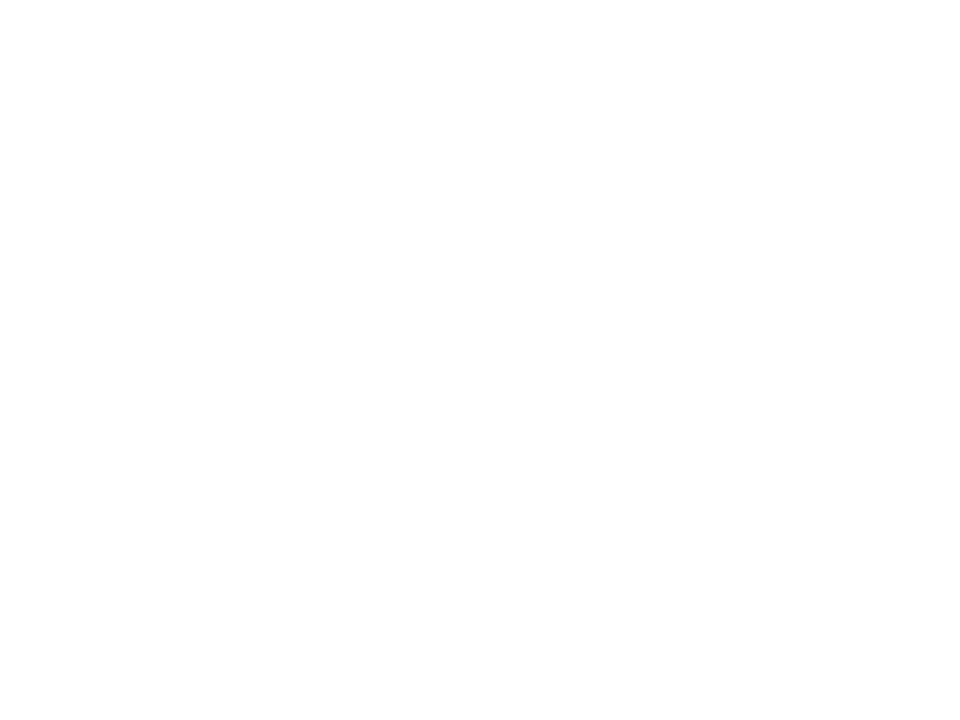

In [6]:

#np.savetxt('./node2vec/emb/'+str(10)+'.emb',i)
x,y= np.loadtxt('./'+str(2)+'/'+'embed.txt',usecols=(0,1),unpack=True)
print(x,y)
#i=ide
#print(i)
#print(i[0])
plt.scatter(x,y,s=1)
#plt.scatter(x[1],y[1],c='r')
#plt.scatter(x[i==4],y[i==4],c='blue')
#plt.scatter(x[i==5],y[i==5],c='g')
#plt.scatter(x[i==6],y[i==6],c='black')
#plt.scatter(x[i==7],y[i==7],c='violet')
#plt.scatter(x[i==10],y[i==10],c='orange')
#plt.scatter(x[i==2],y[i==2],c='grey')

In [7]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

run=13

x,y,r,ide,split_id,split_prob,t= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)



x=x[1:]
y=y[1:]
t=t[1:]

#id1,id2=np.loadtxt('./'+str(run)+'_GT'+'/'+'reconstruct.edgelist', delimiter='\t', usecols=(0,1), unpack=True)
#id1,id2=np.loadtxt('./'+str(run)+'_GT'+'/'+'A.edgelist', delimiter='\t', usecols=(0,1), unpack=True)
id1,id2,w=np.loadtxt('./node2vec/graph/'+str(run)+'.edgelist', delimiter='\t', usecols=(0,1,2), unpack=True)
xline=[]
yline=[]
tline=[]
for i in range(len(id1)):
    
    xline=[]
    yline=[]
    tline=[]
    
    print(id1[i],id2[i])
    xline.append(x[int(id1[i]-1)])   
    yline.append(y[int(id1[i]-1)])
    tline.append(t[int(id1[i]-1)])
    
    xline.append(x[int(id2[i]-1)])
    yline.append(y[int(id2[i]-1)])
    tline.append(t[int(id2[i]-1)])
    
    print(xline)
    
    ax.plot3D(tline, yline, xline, c='red',alpha=w[i]/100)
    #ax.plot3D(tline, yline, xline, c='grey')


#zline = np.linspace(0, 15, 1000)
#xline = np.sin(zline)
#yline = np.cos(zline)
#

# Data for three-dimensional scattered points
zdata = x
xdata = t
ydata = y
ax.scatter3D(xdata, ydata, zdata);

#plt.savefig('./TimeGraph.png',dpi=my_dpi,transparent=False) 

<IPython.core.display.Javascript object>

1.0 5.0
[0.14559118236472945, 0.18072673146939164]
2.0 6.0
[0.9481963927855711, 0.9700308392350724]
3.0 7.0
[0.3854709418837675, 0.3848541554507771]
4.0 9.0
[0.9018036072144288, 0.995540328530981]
5.0 10.0
[0.18072673146939164, 0.178881160768167]
6.0 9.0
[0.9700308392350724, 0.995540328530981]
7.0 8.0
[0.3848541554507771, 0.32567575547151917]
8.0 13.0
[0.32567575547151917, 0.3583631291734127]
9.0 12.0
[0.995540328530981, 0.9606039579853429]
10.0 11.0
[0.178881160768167, 0.17467896045089307]
11.0 14.0
[0.17467896045089307, 0.12630906427130634]
12.0 16.0
[0.9606039579853429, 0.9632456695762465]
13.0 15.0
[0.3583631291734127, 0.4136430105215118]
14.0 19.0
[0.12630906427130634, 0.13911531262854607]
15.0 18.0
[0.4136430105215118, 0.41933961457141194]
16.0 17.0
[0.9632456695762465, 0.8944494907961754]
17.0 22.0
[0.8944494907961754, 0.885671750045128]
18.0 21.0
[0.41933961457141194, 0.40305149146628066]
19.0 20.0
[0.13911531262854607, 0.18165301435743655]
20.0 25.0
[0.18165301435743655, 0.244

104.0 107.0
[0.394329639408998, 0.4383838633443878]
104.0 109.0
[0.394329639408998, 0.3506432983928691]
104.0 112.0
[0.394329639408998, 0.2341708689097343]
105.0 113.0
[0.014028056112224447, 0.11022044088176351]
105.0 114.0
[0.014028056112224447, 0.0959958914506864]
105.0 115.0
[0.014028056112224447, 0.1942108808407417]
106.0 108.0
[0.9397072364465299, 0.8764748539609271]
106.0 110.0
[0.9397072364465299, 0.9322832169144311]
106.0 111.0
[0.9397072364465299, 1.0437705043338323]
107.0 121.0
[0.4383838633443878, 0.4130173871927528]
108.0 118.0
[0.8764748539609271, 0.8939181369206501]
108.0 120.0
[0.8764748539609271, 0.9044930830810803]
108.0 125.0
[0.8764748539609271, 1.0036301822891311]
109.0 116.0
[0.3506432983928691, 0.2963495547090982]
109.0 117.0
[0.3506432983928691, 0.2004008016032064]
109.0 119.0
[0.3506432983928691, 0.18276455402764116]
109.0 124.0
[0.3506432983928691, 0.29058116232464926]
110.0 118.0
[0.9322832169144311, 0.8939181369206501]
110.0 120.0
[0.9322832169144311, 0.90449

163.0 172.0
[0.9461008196508914, 1.0453371293966238]
163.0 174.0
[0.9461008196508914, 0.7945145498927575]
163.0 180.0
[0.9461008196508914, 0.7354709418837675]
164.0 175.0
[0.32611979163980953, 0.25489853258050676]
164.0 176.0
[0.32611979163980953, 0.1871234749359563]
164.0 179.0
[0.32611979163980953, 0.28001245845727074]
164.0 181.0
[0.32611979163980953, 0.1744209474884598]
164.0 182.0
[0.32611979163980953, 0.38138354537314445]
165.0 168.0
[0.2985971943887775, 0.23905203495728164]
165.0 177.0
[0.2985971943887775, 0.3842298669999506]
166.0 168.0
[0.14963223869621917, 0.23905203495728164]
166.0 175.0
[0.14963223869621917, 0.25489853258050676]
166.0 178.0
[0.14963223869621917, 0.14619858098967067]
166.0 181.0
[0.14963223869621917, 0.1744209474884598]
167.0 170.0
[0.507935428745171, 0.5193740150215064]
168.0 184.0
[0.23905203495728164, 0.24010871959364305]
168.0 185.0
[0.23905203495728164, 0.11443261867899397]
168.0 189.0
[0.23905203495728164, 0.2268986713092142]
168.0 191.0
[0.23905203495

198.0 208.0
[0.23597181858163918, 0.3005752932301331]
198.0 215.0
[0.23597181858163918, 0.09810577219354741]
199.0 220.0
[0.26106285174280225, 0.25139383099517726]
199.0 221.0
[0.26106285174280225, 0.26889738517987816]
199.0 225.0
[0.26106285174280225, 0.4287168342812752]
199.0 234.0
[0.26106285174280225, 0.24134383541954801]
200.0 224.0
[0.3663058437798635, 0.23657942952800334]
200.0 227.0
[0.3663058437798635, 0.24792577975280308]
200.0 228.0
[0.3663058437798635, 0.33703618042632494]
200.0 231.0
[0.3663058437798635, 0.3113350952753525]
200.0 232.0
[0.3663058437798635, 0.5300059109423704]
201.0 218.0
[0.8012950263036873, 0.8851160049446462]
201.0 222.0
[0.8012950263036873, 0.7879966722497808]
201.0 229.0
[0.8012950263036873, 0.8713466018378693]
201.0 233.0
[0.8012950263036873, 0.9410428583491531]
202.0 219.0
[0.20650089976732253, 0.14544849217695377]
202.0 223.0
[0.20650089976732253, 0.1435107931863012]
202.0 224.0
[0.20650089976732253, 0.23657942952800334]
202.0 227.0
[0.2065008997673

In [8]:
def colour_func(ii,prev_c,prev_id,id1,id2):
    id1=id1[id2==ii]
    #print(id1,id2)
    if len(id1)==0:
        print('ii',ii)
        print(prev_c)
        return prev_c[int(ii-2)],False
    if id1==1:
        return 'black',True
    else:
        #print(id1,prev_id,prev_c)
        print('prev_c',np.array(prev_c))
        c_cf=np.array(prev_c)[prev_id==id1[0]]
        print('c',c_cf)
    return c_cf[0],False
    


c=['blue','green','violet']

id,tt = np.loadtxt('./'+str(run)+'/'+'timetable.txt', delimiter='\t', usecols=(0,1), unpack=True)
id=id[1:]
tt=tt[1:]
id_f=[2,3,4]


print(c[id_f==1])


    


for t in range(31):
    
        
    
    my_dpi=96
    pix=150
    
    
    fig = plt.figure(figsize=(pix/my_dpi, pix/my_dpi), dpi=my_dpi)
    fig = plt.gcf()
    ax = fig.gca()
    
    print('c_full',c)
    prev_c=c
    prev_id=id_f
    
    c=[]
    id_f=[]
    
    for u in range(len(id[tt==t])):
        x_n=x[int(id[tt==t][u]-1)]  
        y_n=y[int(id[tt==t][u]-1)]
        r_n=r[int(id[tt==t][u]-1)]  
        c_cf,rec=colour_func(id[tt==t][u],prev_c,prev_id,id1,id2)
        c.append(c_cf)
        #print('c.app',c)
        id_f.append(id[tt==t][u])
        if rec:
            rec1=plt.Rectangle((x_n,y_n), r_n, r_n,fc=c_cf,ec=c_cf) 
            ax.add_patch(rec1)
        else:
            circ1=plt.Circle((x_n,y_n), r_n, color=c_cf)
            ax.add_patch(circ1)
        
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    plt.savefig('./'+str(run)+'_GT'+'/'+str(t)+'.png',dpi=my_dpi,transparent=False) 

blue


<IPython.core.display.Javascript object>

c_full ['blue', 'green', 'violet']
ii 2.0
['blue', 'green', 'violet']
ii 3.0
['blue', 'green', 'violet']
ii 4.0
['blue', 'green', 'violet']


<IPython.core.display.Javascript object>

c_full ['blue', 'green', 'violet']
prev_c ['blue' 'green' 'violet']
c ['blue']
prev_c ['blue' 'green' 'violet']
c ['green']
prev_c ['blue' 'green' 'violet']
c []


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
x_t=[]
for j in range(len(ide)):
    x_t=[]
    x_t.append(x[ide==j])
    print(str(j),x_t)